# What is Pneumonia?
**Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli.Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases.Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. Diagnosis is often based on symptoms and physical examination. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis.The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.**

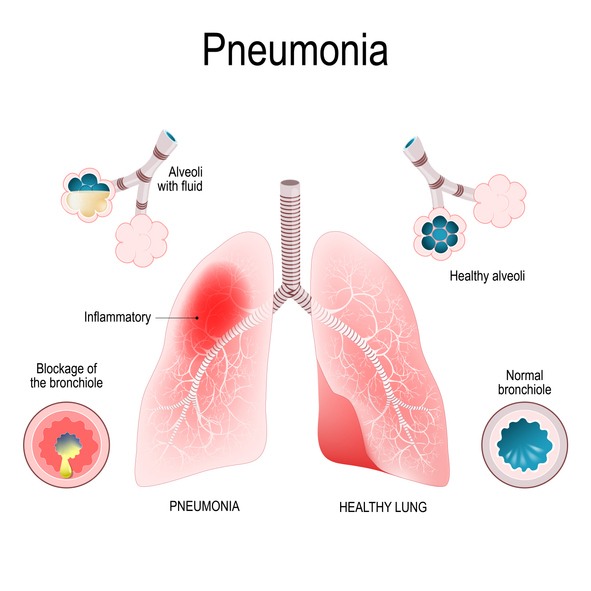

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:




import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1191-0001.jpeg
/content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1180-0001.jpeg
/content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1175-0001.jpeg
/content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1181-0001.jpeg
/content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1179-0001.jpeg
/content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1177-0001.jpeg
/content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1258-0001.jpeg
/content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1245-0001.jpeg
/content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1234-0001.jpeg
/content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1237-0001.jpeg
/content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1227-0001.jpeg
/content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1225-0001.jpeg
/content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-1220-0001.jpeg


# Importing the necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

# Description of the Pneumonia Dataset
**The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).
Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.
For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.**

In [ ]:
img_arr = cv2.imread('/content/drive/MyDrive/chest_xray/test/NORMAL/IM-0001-0001.jpeg', cv2.IMREAD_GRAYSCALE)


In [ ]:
img_arr.shape

(1317, 1857)

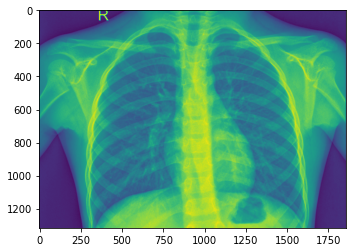

In [ ]:
plt.imshow(img_arr)

In [ ]:
resized_arr = cv2.resize(img_arr, (150, 150)) # Reshaping images to preferred size
print(resized_arr)

[[36 32 32 ... 32 35 33]
 [30 30 30 ... 30 29 31]
 [34 32 32 ... 32 32 32]
 ...
 [31 27 29 ... 30 33 35]
 [30 29 26 ... 34 34 32]
 [29 28 29 ... 31 29 36]]


In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm

In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in tqdm(os.listdir(path)):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# Loading the Dataset

In [ ]:
train = get_training_data('/content/drive/MyDrive/chest_xray/train')



 78%|███████▊  | 3012/3875 [18:21<05:43,  2.51it/s]

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'




100%|██████████| 3875/3875 [25:02<00:00,  2.58it/s]

 77%|███████▋  | 1030/1342 [12:52<03:04,  1.69it/s]

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'




100%|██████████| 1342/1342 [16:43<00:00,  1.34it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [ ]:
test = get_training_data('/content/drive/MyDrive/chest_xray/test')
val = get_training_data('/content/drive/MyDrive/chest_xray/val')


100%|██████████| 390/390 [02:59<00:00,  2.18it/s]

100%|██████████| 234/234 [02:01<00:00,  1.93it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app

 67%|██████▋   | 6/9 [00:03<00:01,  1.80it/s]

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'




100%|██████████| 9/9 [00:04<00:00,  1.94it/s]

 11%|█         | 1/9 [00:00<00:03,  2.23it/s]

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'




100%|██████████| 9/9 [00:03<00:00,  2.29it/s]


# Data Visualization & Preprocessing

In [ ]:
#pd.Series(l).value_counts()

NameError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


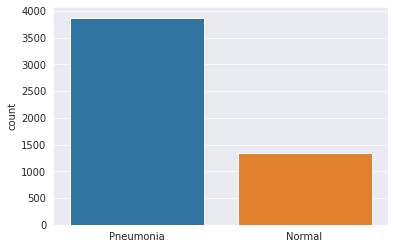

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)        

**The data seems imbalanced . To increase the no. of training examples, we will use data augmentation**

**Previewing the images of both the classes**

Text(0.5, 1.0, 'NORMAL')

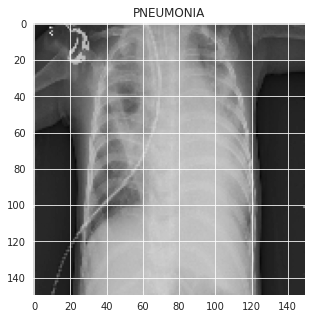

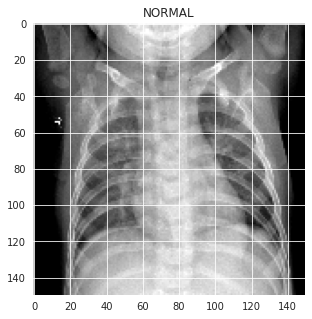

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

**We perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converges faster on [0..1] data than on [0..255].**

In [ ]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

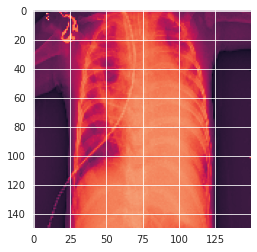

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train.shape

(5215, 150, 150)

In [ ]:
x_train.reshape(-1, img_size, img_size, 1).shape

(5215, 150, 150, 1)

In [ ]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# Data Augmentation
**In order to avoid overfitting problem, we need to expand artificially our dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations.
Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.
By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.**

In [ ]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

For the data augmentation, i choosed to :
1. Randomly rotate some training images by 30 degrees 
2. Randomly Zoom by 20% some training images
3. Randomly shift images horizontally by 10% of the width 
4. Randomly shift images vertically by 10% of the height 
5. Randomly flip images horizontally.
Once our model is ready, we fit the training dataset.

# Training the Model

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

In [ ]:
model=keras.models.load_model('/content/drive/MyDrive/chest_xray/model.h5')

In [ ]:
model.save('/content/drive/MyDrive/chest_xray/model.h5')

In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 22s 311ms/step - loss: 0.2839 - accuracy: 0.9006
Loss of the model is -  0.28392598032951355
20/20 [==============================] - 6s 313ms/step - loss: 0.2839 - accuracy: 0.9006
Accuracy of the model is -  90.06410241127014 %


# Analysis after Model Training

NameError: ignored

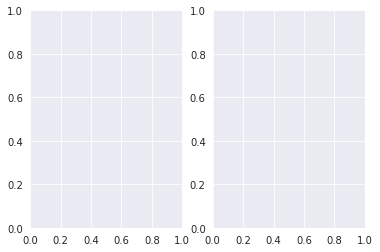

In [ ]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.92      0.92      0.92       390
   Normal (Class 1)       0.87      0.86      0.87       234

           accuracy                           0.90       624
          macro avg       0.89      0.89      0.89       624
       weighted avg       0.90      0.90      0.90       624



In [ ]:
cm = confusion_matrix(y_test,predictions)
cm

array([[360,  30],
       [ 32, 202]])

In [ ]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,plot_precision_recall_curve,precision_recall_fscore_support,plot_roc_curve 

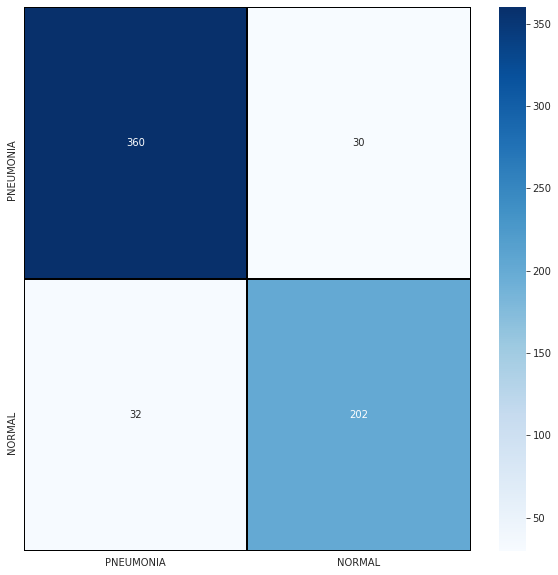

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

**Some of the Correctly Predicted Classes**

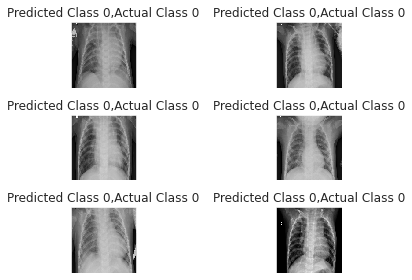

In [ ]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

**Some of the Incorrectly Predicted Classes**

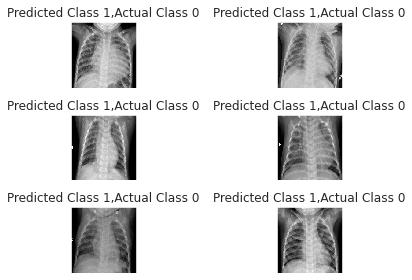

In [ ]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

In [ ]:
model.save('/content/drive/MyDrive/chest_xray/model.h5')

In [ ]:
!pip install gradio

     |████████████████████████████████| 2.4MB 14.5MB/s 
     |████████████████████████████████| 215kB 46.5MB/s 
     |████████████████████████████████| 1.9MB 48.4MB/s 
     |████████████████████████████████| 962kB 32.6MB/s 
     |████████████████████████████████| 3.2MB 39.4MB/s 
     |████████████████████████████████| 71kB 9.5MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=a5c4490a2b527b9d22d85f95e895a41e754a316be1fb1f1c631e9280026ef365
  Stored in directory: /root/.cache/pip/wheels/cc/ac/c4/bef572cb7e52bfca170046f567e64858632daf77e0f34e5a74
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=7aa8d80b214581919a77767f36a9c20f9a9d009ea0bff95114bd908c1d4559be
  Stored in directory: /root/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
Successfully built ffmpy flask-cachebuster


In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
import requests
import cv2

In [ ]:
path='/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg'

In [ ]:
#classify_image(path)

{'NORMAL': 0.9095999971032143, 'PNEUMONIA': 0.09040000289678574}

In [ ]:
def classify_image(inp):
  img_arr = cv2.imread(inp, cv2.IMREAD_GRAYSCALE)
  #gray = cv2.cvtColor(inp, cv2.COLOR_BGR2GRAY)
  resized_arr = cv2.resize(img_arr, (150, 150))
  #img_arr.shape,resized_arr.shape
  uploaded = np.array(resized_arr) / 255
  #plt.imshow(uploaded)
  uploaded_reshaped = uploaded.reshape(-1, 150, 150, 1)
  #plt.imshow(uploaded_reshaped[0])
  predictions=model.predict(uploaded_reshaped)
  prediction=[]
  if int(np.round(model.predict(uploaded_reshaped)[0][0]))==0: 
    prediction.append(np.round(model.predict(uploaded_reshaped)[0][0],4))
    prediction.append(1-np.round(model.predict(uploaded_reshaped)[0][0],4))
  else:
    prediction.append(1-np.round(model.predict(uploaded_reshaped)[0][0],4))
    prediction.append(np.round(model.predict(uploaded_reshaped)[0][0],4))
  return {labels[i]: float(prediction[i]) for i in range(2)}

In [ ]:
def classify_image(inp):
  #img_arr = cv2.imread(np.array(inp), cv2.IMREAD_GRAYSCALE)
  gray = cv2.cvtColor(np.array(inp), cv2.COLOR_BGR2GRAY)
  resized_arr = cv2.resize(gray, (150, 150))
  #img_arr.shape,resized_arr.shape
  uploaded = np.array(resized_arr) / 255
  #plt.imshow(uploaded)
  uploaded_reshaped = uploaded.reshape(-1, 150, 150, 1)
  #plt.imshow(uploaded_reshaped[0])
  predictions=model.predict(uploaded_reshaped)
  a=0;b=0
  if int(np.round(model.predict(uploaded_reshaped)[0][0]))==0: 
    a=1-np.round(model.predict(uploaded_reshaped)[0][0],4)
    b=np.round(model.predict(uploaded_reshaped)[0][0],4)
  else:
    a=np.round(model.predict(uploaded_reshaped)[0][0],4)
    b=1-np.round(model.predict(uploaded_reshaped)[0][0],4)
  return {labels[i]: float([a,b][i]) for i in range(2)}
  #return {labels[int(np.round(model.predict(uploaded_reshaped)[0][0]))]: int(np.round(model.predict(uploaded_reshaped)[0][0]))}

image = gr.inputs.Image()
#print(image)
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=classify_image, inputs=image, outputs=label, capture_session=True).launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://39199.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7871/',
 'https://39199.gradio.app')